In [1]:
library(Seurat)
library(patchwork)
library(dplyr)
library(Matrix)
library(biomaRt)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(pillar)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack




In [4]:
setwd('/lustre1/project/stg_00041/Irene/10X_NAIVE_TSC_2021/nonaggr_noMEFs_mouse_human_analysis')

load all count matrixes from Cell Ranger

In [107]:
matNAIVE_38 <- read.csv("NAIVE_DMSO_38_countMtx_Irene_2021.csv",row.names =1)
matNAIVEPRC2i_38 <- read.csv("NAIVE_PRC2i_38_countMtx_Irene_2021.csv",row.names =1)
matTSC_38 <- read.csv("TSC_DMSO_38_countMtx_Irene_2021.csv",row.names =1)
matTSCPRC2i_38 <- read.csv("TSC_PRC2i_38_countMtx_Irene_2021.csv",row.names =1)

In [219]:
matNAIVE_mm10 <- read.csv("NAIVE_DMSO_mm10_countMtx_Irene_2021.csv",row.names =1)
matNAIVEPRC2i_mm10 <- read.csv("NAIVE_PRC2i_mm10_countMtx_Irene_2021.csv",row.names =1)
matTSC_mm10 <- read.csv("TSC_DMSO_mm10_countMtx_Irene_2021.csv",row.names =1)
matTSCPRC2i_mm10 <- read.csv("TSC_PRC2i_mm10_countMtx_Irene_2021.csv",row.names =1)

Create the Seurat object with the raw (non-normalized data).

In [108]:
seurat_object_NAIVE_38 <- CreateSeuratObject(
  counts = matNAIVE_38,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

seurat_object_NAIVE_PRC2i_38 <- CreateSeuratObject(
  counts = matNAIVEPRC2i_38,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

seurat_object_TSC_38 <- CreateSeuratObject(
  counts = matTSC_38,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

seurat_object_TSC_PRC2i_38 <- CreateSeuratObject(
  counts = matTSCPRC2i_38,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

In [109]:
seurat_object_NAIVE_38
seurat_object_NAIVE_PRC2i_38
seurat_object_TSC_38
seurat_object_TSC_PRC2i_38

An object of class Seurat 
24370 features across 3894 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

An object of class Seurat 
24370 features across 4149 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

An object of class Seurat 
24370 features across 1195 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

An object of class Seurat 
24370 features across 1706 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [163]:
seurat_object_NAIVE_mm10 <- CreateSeuratObject(
  counts = matNAIVE_mm10,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

seurat_object_NAIVE_PRC2i_mm10 <- CreateSeuratObject(
  counts = matNAIVEPRC2i_mm10,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

seurat_object_TSC_mm10 <- CreateSeuratObject(
  counts = matTSC_mm10,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

seurat_object_TSC_PRC2i_mm10 <- CreateSeuratObject(
  counts = matTSCPRC2i_mm10,
  project = "naive_TSC_PRC2i_Irene_VP", 
  min.cells = 0,
  min.features = 0)

Seurat allows you to easily explore QC metrics and filter cells based on any user-defined criteria. A few QC metrics commonly used by the community include

The number of unique genes detected in each cell.
Low-quality cells or empty droplets will often have very few genes
Cell doublets or multiplets may exhibit an aberrantly high gene count
Similarly, the total number of molecules detected within a cell (correlates strongly with unique genes)
The percentage of reads that map to the mitochondrial genome
Low-quality / dying cells often exhibit extensive mitochondrial contamination
We calculate mitochondrial QC metrics with the PercentageFeatureSet() function, which calculates the percentage of counts originating from a set of features
We use the set of all genes starting with MT- as a set of mitochondrial genes

let's check human and mouse mitochondrial genes (MT for human and mt for mouse)

In [110]:
MT.geneNAIVE_38 <- grep(pattern = "^MT-", x = rownames(matNAIVE_38), value = TRUE) 
MT.geneNAIVEPRC2i_38 <- grep(pattern = "^MT-", x = rownames(matNAIVEPRC2i_38), value = TRUE) 
MT.geneTSC_38 <- grep(pattern = "^MT-", x = rownames(matTSC_38), value = TRUE) 
MT.geneTSCPRC2i_38 <- grep(pattern = "^MT-", x = rownames(matTSCPRC2i_38), value = TRUE) 

In [111]:
head(MT.geneNAIVE_38)

[1] "MT-ND6" "MT-CO2" "MT-CYB" "MT-ND2" "MT-ND5" "MT-CO1"

In [112]:
seurat_object_NAIVE_38[["percent.MT"]] <- PercentageFeatureSet(seurat_object_NAIVE_38, pattern = "^MT[-]")
seurat_object_NAIVE_PRC2i_38[["percent.MT"]] <- PercentageFeatureSet(seurat_object_NAIVE_PRC2i_38, pattern = "^MT[-]")
seurat_object_TSC_38[["percent.MT"]] <- PercentageFeatureSet(seurat_object_TSC_38, pattern = "^MT[-]")
seurat_object_TSC_PRC2i_38[["percent.MT"]] <- PercentageFeatureSet(seurat_object_TSC_PRC2i_38, pattern = "^MT[-]")

In [113]:
head(seurat_object_NAIVE_38@meta.data)

orig.ident               nCount_RNA nFeature_RNA percent.MT
AAACCCAAGAAACTAC.1 naive_TSC_PRC2i_Irene_VP   404       319          7.178218 
AAACCCACACATTACG.1 naive_TSC_PRC2i_Irene_VP   459       334         10.893246 
AAACCCACAGGCGTTC.1 naive_TSC_PRC2i_Irene_VP 13538      3997         10.082730 
AAACCCAGTATGAGCG.1 naive_TSC_PRC2i_Irene_VP 23685      5289         12.037154 
AAACGAAAGATAGTGT.1 naive_TSC_PRC2i_Irene_VP   322       239         10.869565 
AAACGAAAGGCCTGAA.1 naive_TSC_PRC2i_Irene_VP 19616      4812          5.082586

Exploratory analysis to distinguish human from mouse cells

In [115]:
# Merge the two seurat objects for naive and TSC cells into one 

In [117]:
seurat_object_naive <- merge(seurat_object_NAIVE_38, y = seurat_object_NAIVE_PRC2i_38, add.cell.ids = c("NAIVE", "NAIVEPRC2i"), project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object_naive

An object of class Seurat 
24370 features across 8043 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [165]:
seurat_object_naive_mm10 <- merge(seurat_object_NAIVE_mm10, y = seurat_object_NAIVE_PRC2i_mm10, add.cell.ids = c("NAIVE", "NAIVEPRC2i"), project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object_naive_mm10

An object of class Seurat 
32122 features across 8043 samples within 1 assay 
Active assay: RNA (32122 features, 0 variable features)

In [118]:
seurat_object_TSC <- merge(seurat_object_TSC_38, y = seurat_object_TSC_PRC2i_38, add.cell.ids = c("TSC", "TSCPRC2i"), project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object_TSC

An object of class Seurat 
24370 features across 2901 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [166]:
seurat_object_TSC_mm10 <- merge(seurat_object_TSC_mm10, y = seurat_object_TSC_PRC2i_mm10, add.cell.ids = c("TSC", "TSCPRC2i"), project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object_TSC_mm10

An object of class Seurat 
32122 features across 2901 samples within 1 assay 
Active assay: RNA (32122 features, 0 variable features)

In [119]:
seurat_object_naive_norm <- NormalizeData(seurat_object_naive, normalization.method = "LogNormalize", scale.factor = 10000)
seurat_object_TSC_norm <- NormalizeData(seurat_object_TSC, normalization.method = "LogNormalize", scale.factor = 10000)

In [203]:
seurat_object_naive_mm10_norm <- NormalizeData(seurat_object_naive_mm10, normalization.method = "LogNormalize", scale.factor = 10000)
seurat_object_TSC_mm10_norm <- NormalizeData(seurat_object_TSC_mm10, normalization.method = "LogNormalize", scale.factor = 10000)

In [120]:
seurat_object_naive_norm <- FindVariableFeatures(seurat_object_naive_norm, selection.method = "vst", nfeatures = 2000)
seurat_object_TSC_norm <- FindVariableFeatures(seurat_object_TSC_norm, selection.method = "vst", nfeatures = 2000)

In [204]:
seurat_object_naive_mm10_norm <- FindVariableFeatures(seurat_object_naive_mm10_norm, selection.method = "vst", nfeatures = 2000)
seurat_object_TSC_mm10_norm <- FindVariableFeatures(seurat_object_TSC_mm10_norm, selection.method = "vst", nfeatures = 2000)

In [121]:
all.genes.naive <- rownames(seurat_object_naive_norm)
seurat_object_naive_norm <- ScaleData(seurat_object_naive_norm, features = all.genes.naive)

Centering and scaling data matrix



In [205]:
all.genes.naive <- rownames(seurat_object_naive_mm10_norm)
seurat_object_naive_mm10_norm <- ScaleData(seurat_object_naive_mm10_norm, features = all.genes.naive)

Centering and scaling data matrix



In [122]:
all.genes.tsc <- rownames(seurat_object_TSC_norm)
seurat_object_TSC_norm <- ScaleData(seurat_object_TSC_norm, features = all.genes.tsc)

Centering and scaling data matrix



In [206]:
all.genes.tsc <- rownames(seurat_object_TSC_mm10_norm)
seurat_object_TSC_mm10_norm <- ScaleData(seurat_object_TSC_mm10_norm, features = all.genes.tsc)

Centering and scaling data matrix



In [207]:
head(seurat_object_TSC_mm10_norm@meta.data)

orig.ident               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP 113         99         
TSC_AAACCCAGTAGTTCCA.1 naive_TSC_PRC2i_Irene_VP 401        243         
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 163        147         
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 105        101         
TSC_AAAGGGCCACCAAAGG.1 naive_TSC_PRC2i_Irene_VP  19         19         
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP 100         84

In [209]:
seurat_object_naive_mm10_norm <- RunPCA(seurat_object_naive_mm10_norm, 
                         features = VariableFeatures(object = seurat_object_naive_mm10_norm),
                         npcs=60,
                         nfeatures.print=10,
                         ndims.print=1:5,
                         seed.use=25)

PC_ 1 
Positive:  SLC25A5, PEBP1, NUCKS1, SLC25A6, HMGA1, EEF1B2, PABPC1, KPNB1, AKAP12, MYBL2 
Negative:  PLCG2, CCDC26, ZEB2, CGA, TPH2, HTR2A, ITPKB-AS1, ITGA11, PRAMEF5, STRC 
PC_ 2 
Positive:  RPS12, RPS27, RPL28, RPS28, RPL39, RPS23, RPL36, RPS20, RPS11, RPL29 
Negative:  MALAT1, ZNF208, MT-ND6, MEG8, CCDC144A, DST, ZNF729, SNHG14, KCNQ1OT1, NEAT1 
PC_ 3 
Positive:  SLC2A1, BNIP3, IGFBP2, MIAT, FAM162A, DDIT4, SLC16A3, MCM5, PFKFB4, LDHA 
Negative:  TOP2A, PLK1, MKI67, CENPF, CENPE, TPX2, CCNB1, AURKA, HMMR, KIF23 
PC_ 4 
Positive:  H1-3, H1-5, H1-2, NNT, H1-1, ZNF208, ATG9B, ZNF729, H1-4, INTS1 
Negative:  LGALS1, CPS1, ESRG, PMAIP1, MYEF2, GADL1, UCHL1, GAP43, HMMR, NREP 
PC_ 5 
Positive:  SYVN1, BASP1, H2AZ1, IFITM1, MCM5, TPM2, TMSB4X, UNG, YPEL2, LCP1 
Negative:  TOP2A, RPS10, GYPC, MEIS2, SLC16A3, TUBB2B, AURKA, PLK1, PIF1, TUBB2A 



In [216]:
seurat_object_naive_mm10_norm

An object of class Seurat 
24370 features across 8043 samples within 1 assay 
Active assay: RNA (24370 features, 2000 variable features)
 2 dimensional reductions calculated: pca, tsne

In [217]:
seurat_object_TSC_mm10_norm

An object of class Seurat 
32122 features across 2901 samples within 1 assay 
Active assay: RNA (32122 features, 2000 variable features)
 1 dimensional reduction calculated: pca

In [210]:
seurat_object_TSC_mm10_norm <- RunPCA(seurat_object_TSC_mm10_norm, 
                         features = VariableFeatures(object = seurat_object_TSC_mm10_norm),
                         npcs=60,
                         nfeatures.print=10,
                         ndims.print=1:5,
                         seed.use=25)

PC_ 1 
Positive:  Tpm1, Zfp703, Ttc28, Gm2115, Neat1, Frmd6, Rbms3, Kcnq1ot1, Spred1, Trp53inp1 
Negative:  Pecam1, Olfr729, Cacng2, Dll4, Gm35439, Aox3, 4933402J15Rik, 4930562C15Rik, Dync1i1, Eomes 
PC_ 2 
Positive:  Hoxb9, Akap12, Hoxb7, Ptn, Grem2, Flt1, Hoxb4, Hoxc8, Gata6, Ildr2 
Negative:  Plce1, Mecom, Sned1, Hoxd13, Vav3, Pcdh17, Itgb8, Slc7a11, Bmp2, Hapln1 
PC_ 3 
Positive:  Cavin2, Cryab, Tmsb10, Celf2, Rpl32, Ccnd1, Nme2, Rps25, Fam162a, Rps2 
Negative:  Kcnq1ot1, D10Wsu102e, Mirg, Sipa1l2, B830012L14Rik, Rian, Gm47283, Meg3, Nav1, 9530059O14Rik 
PC_ 4 
Positive:  Fbn2, S1pr3, Itga1, Cdh6, Adamts2, Gab1, Map2, Fbn1, Ebf1, Col4a5 
Negative:  Anxa8, 1700007K13Rik, Areg, Ubash3b, E2f8, Ar, Cda, Hspa4l, Alox5, Zfp750 
PC_ 5 
Positive:  Hapln1, Car10, Sox11, Map2, Sema6a, Fbn2, Satb1, Nrxn1, Kcnj2, Adcyap1 
Negative:  Ifit1, Irf7, Parp14, Gbp7, Ifi203, Rtp4, Irgm2, Slfn9, Slfn2, Iigp1 



In [123]:
seurat_object_naive_norm <- RunPCA(seurat_object_naive_norm, 
                         features = VariableFeatures(object = seurat_object_naive_norm),
                         npcs=60,
                         nfeatures.print=10,
                         ndims.print=1:5,
                         seed.use=25)

PC_ 1 
Positive:  SLC25A5, PEBP1, NUCKS1, SLC25A6, HMGA1, EEF1B2, PABPC1, KPNB1, AKAP12, MYBL2 
Negative:  PLCG2, CCDC26, ZEB2, CGA, TPH2, HTR2A, ITPKB-AS1, ITGA11, PRAMEF5, STRC 
PC_ 2 
Positive:  RPS12, RPS27, RPL28, RPS28, RPL39, RPS23, RPL36, RPS20, RPS11, RPL29 
Negative:  MALAT1, ZNF208, MT-ND6, MEG8, CCDC144A, DST, ZNF729, SNHG14, KCNQ1OT1, NEAT1 
PC_ 3 
Positive:  SLC2A1, BNIP3, IGFBP2, MIAT, FAM162A, DDIT4, SLC16A3, MCM5, PFKFB4, LDHA 
Negative:  TOP2A, PLK1, MKI67, CENPF, CENPE, TPX2, CCNB1, AURKA, HMMR, KIF23 
PC_ 4 
Positive:  H1-3, H1-5, H1-2, NNT, H1-1, ZNF208, ATG9B, ZNF729, H1-4, INTS1 
Negative:  LGALS1, CPS1, ESRG, PMAIP1, MYEF2, GADL1, UCHL1, GAP43, HMMR, NREP 
PC_ 5 
Positive:  SYVN1, BASP1, H2AZ1, IFITM1, MCM5, TPM2, TMSB4X, UNG, YPEL2, LCP1 
Negative:  TOP2A, RPS10, GYPC, MEIS2, SLC16A3, TUBB2B, AURKA, PLK1, PIF1, TUBB2A 



In [124]:
seurat_object_TSC_norm <- RunPCA(seurat_object_TSC_norm, 
                         features = VariableFeatures(object = seurat_object_TSC_norm),
                         npcs=60,
                         nfeatures.print=10,
                         ndims.print=1:5,
                         seed.use=25)

PC_ 1 
Positive:  PLCG2, CCDC26, FILIP1L, NEB, GREM1, CGA, ACOXL-AS1, HHIP, RFPL1, POU3F1 
Negative:  TAGLN2, ARPC2, SRM, SUMO2, S100A10, BASP1, EI24, BTF3, NME2, BRI3 
PC_ 2 
Positive:  LRP2, PRTG, PTN, HAND1, KANK4, GATA2, HAPLN1, TINAGL1, ZFHX3, COLEC12 
Negative:  DPPA5, KHDC3L, UTF1, TDGF1, FRAT2, NANOG, PHC1, KHDC1L, AK4, DPPA3 
PC_ 3 
Positive:  CCKBR, FABP5, PTN, FABP7, RGS16, CEBPA, CD24, VGLL1, DNMT3B, H19 
Negative:  PLAU, LINC02802, FLNC, ANXA1, TAGLN, SERPINE1, CDH13, ACTG2, LPP, CCDC50 
PC_ 4 
Positive:  AASS, VCAN, DSEL, PTPRZ1, SOX11, DPYSL3, TERF1, USP44, PODXL, SEMA6A 
Negative:  S100P, KHDC1L, EFHD1, ALPP, USP18, AGPAT2, CDC25B, ATG9B, MGLL, ALPG 
PC_ 5 
Positive:  TAGLN, MYL9, KRT18, TMSB4X, LGALS1, CAST, NPPB, RBP1, TMSB10, ACTG2 
Negative:  NEAT1, ATG9B, MALAT1, ALPG, MEG9, ZNF729, COL6A1, AHNAK, CREB5, MIAT 



In [125]:
use.pcs = 1:10

In [126]:
seurat_object_naive_norm <- FindNeighbors(seurat_object_naive_norm, dims = use.pcs)
seurat_object_TSC_norm <- FindNeighbors(seurat_object_TSC_norm, dims = use.pcs)

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



In [211]:
seurat_object_naive_mm10_norm <- FindNeighbors(seurat_object_naive_mm10_norm, dims = use.pcs)
seurat_object_TSC_mm10_norm <- FindNeighbors(seurat_object_TSC_mm10_norm, dims = use.pcs)

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



In [128]:
seurat_object_naive_norm <- FindClusters(seurat_object_naive_norm, dims = use.pcs, resolution = 0.2)
seurat_object_TSC_norm <- FindClusters(seurat_object_TSC_norm, dims = use.pcs, resolution = 0.2)

Warning message:
"The following arguments are not used: dims"
Warning message:
"The following arguments are not used: dims"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8043
Number of edges: 250390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8793
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
"The following arguments are not used: dims"
Warning message:
"The following arguments are not used: dims"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2901
Number of edges: 97563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9192
Number of communities: 5
Elapsed time: 0 seconds


In [212]:
seurat_object_naive_mm10_norm <- FindClusters(seurat_object_naive_mm10_norm, dims = use.pcs, resolution = 0.2)
seurat_object_TSC_mm10_norm <- FindClusters(seurat_object_TSC_mm10_norm, dims = use.pcs, resolution = 0.2)

Warning message:
"The following arguments are not used: dims"
Warning message:
"The following arguments are not used: dims"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8043
Number of edges: 250390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8793
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
"The following arguments are not used: dims"
Warning message:
"The following arguments are not used: dims"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2901
Number of edges: 91495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8750
Number of communities: 4
Elapsed time: 0 seconds


change to sample ID to gene names:

In [220]:
barcode <- rownames(seurat_object_naive_norm@meta.data)

In [221]:
seurat_object_naive_norm.2 <- cbind(barcode,seurat_object_naive_norm@meta.data)

In [227]:
seurat_object_naive_norm.3 <- separate(seurat_object_naive_norm.2, barcode, c("sample_ID", NA), sep = "_", remove = FALSE)

ERROR: Error in separate(seurat_object_naive_norm.2, barcode, c("sample_ID", : could not find function "separate"


In [226]:
unique(seurat_object_naive_norm.3$sample_ID)

ERROR: Error in unique(seurat_object_naive_norm.3$sample_ID): object 'seurat_object_naive_norm.3' not found


In [ ]:
sampleidentity <- seurat_object_naive_norm.3["sample_ID"]

In [ ]:
sampleidentity$sample_ID <- as.character(sampleidentity$sample_ID)

In [ ]:
seurat_object_naive_norm <- AddMetaData(
    object = seurat_object_naive_norm, 
    metadata = sampleidentity$sample_ID, 
    col.name = 'sample')

In [ ]:
seurat_object_naive_norm

In [ ]:
barcode <- rownames(seurat_object_tsc_norm@meta.data)

In [ ]:
seurat_object_tsc_norm.2 <- cbind(barcode,seurat_object_tsc_norm@meta.data)

In [ ]:
seurat_object_tsc_norm.3 <- separate(seurat_object_tsc_norm.2, barcode, c("sample_ID", NA), sep = "_", remove = FALSE)

In [ ]:
unique(seurat_object_tsc_norm.3$sample_ID)

In [ ]:
sampleidentity <- seurat_object_tsc_norm.3["sample_ID"]

In [ ]:
sampleidentity$sample_ID <- as.character(sampleidentity$sample_ID)

In [ ]:
seurat_object_tsc_norm <- AddMetaData(
    object = seurat_object_tsc_norm, 
    metadata = sampleidentity$sample_ID, 
    col.name = 'sample')

In [213]:
seurat_object_naive_mm10_norm <- RunTSNE(
  object = seurat_object_naive_mm10_norm,
  reduction = "pca",
  dims = use.pcs)

In [218]:
seurat_object_TSC_mm10_norm

An object of class Seurat 
32122 features across 2901 samples within 1 assay 
Active assay: RNA (32122 features, 2000 variable features)
 1 dimensional reduction calculated: pca

In [214]:
seurat_object_TSC_mm10_norm <- RunTSNE(
  object = seurat_object_TSC_mm10_norm,
  reduction = "pca",
  dims = use.pcs)

ERROR: Error in Rtsne.default(X = object, dims = dim.embed, pca = FALSE, ...): Remove duplicates before running TSNE.


In [ ]:
seurat_object_naive_norm <- RunTSNE(
  object = seurat_object_naive_norm,
  reduction = "pca",
  dims = use.pcs)

In [ ]:
seurat_object_TSC_norm <- RunTSNE(
  object = seurat_object_TSC_norm,
  reduction = "pca",
  dims = use.pcs)

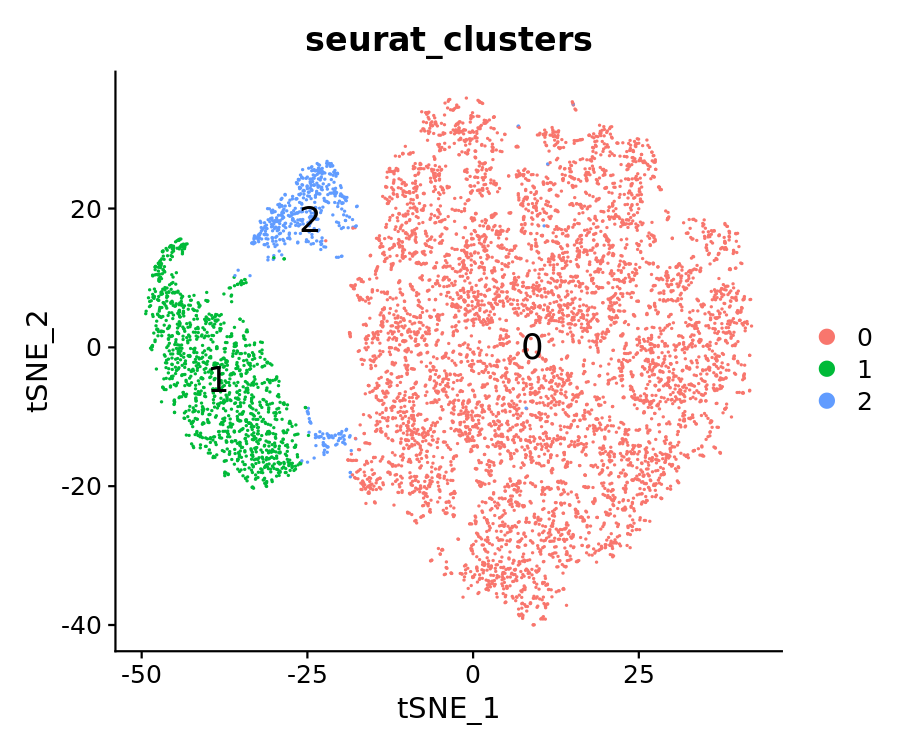

In [135]:
options(repr.plot.width = 6, repr.plot.height = 5)
TSNEPlot(object = seurat_object_naive_norm, pt.size=0.1 , label = T , label.size = 6, group.by = 'seurat_clusters')

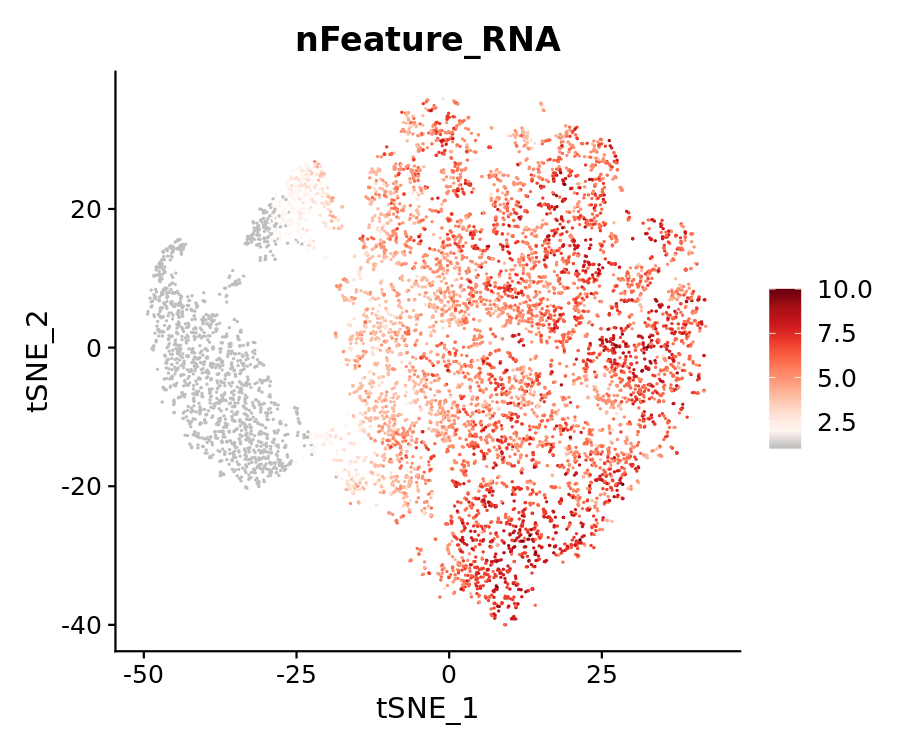

In [146]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
    object = seurat_object_naive_norm, 
    features = "nFeature_RNA", 
            pt.size = 0.1)

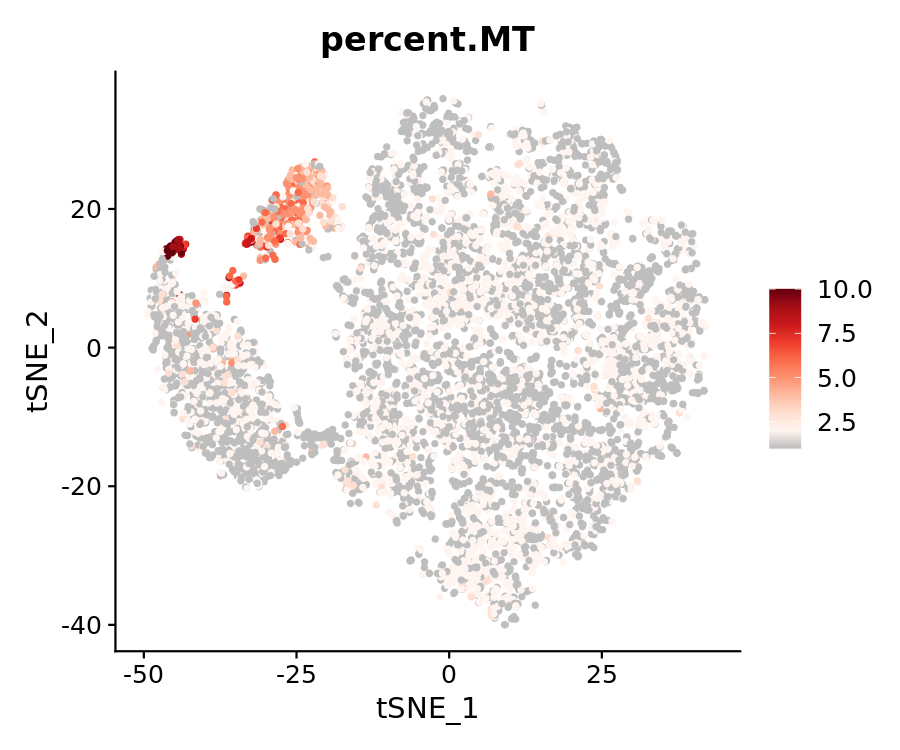

In [156]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
    object = seurat_object_naive_norm, 
    features = "percent.MT", 
            pt.size = 1)

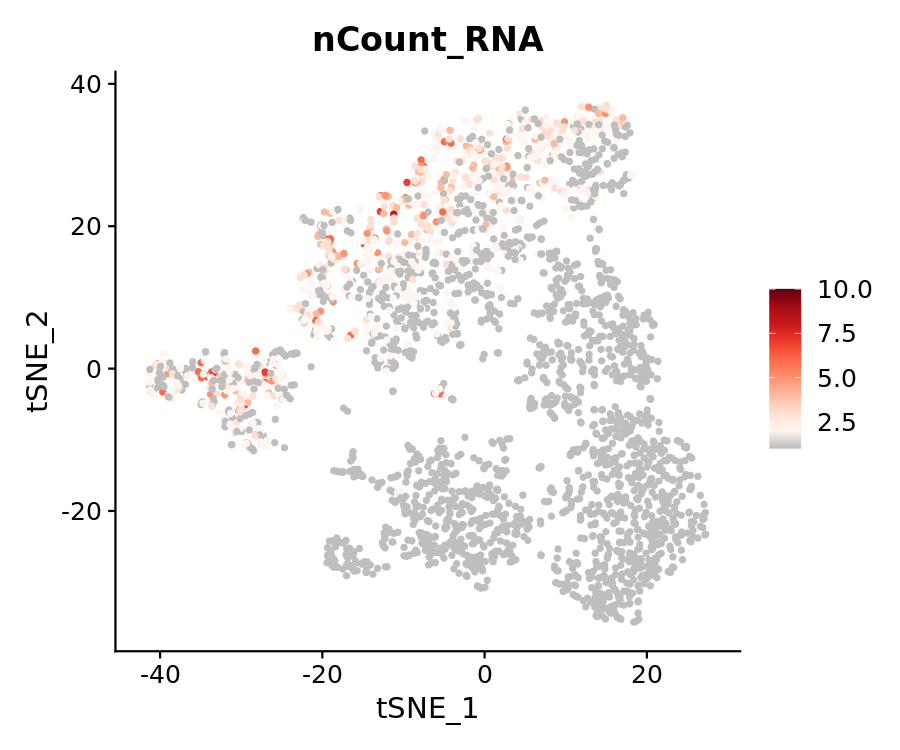

In [138]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
    object = seurat_object_TSC_norm, 
    features = "nCount_RNA", 
            pt.size = 1)

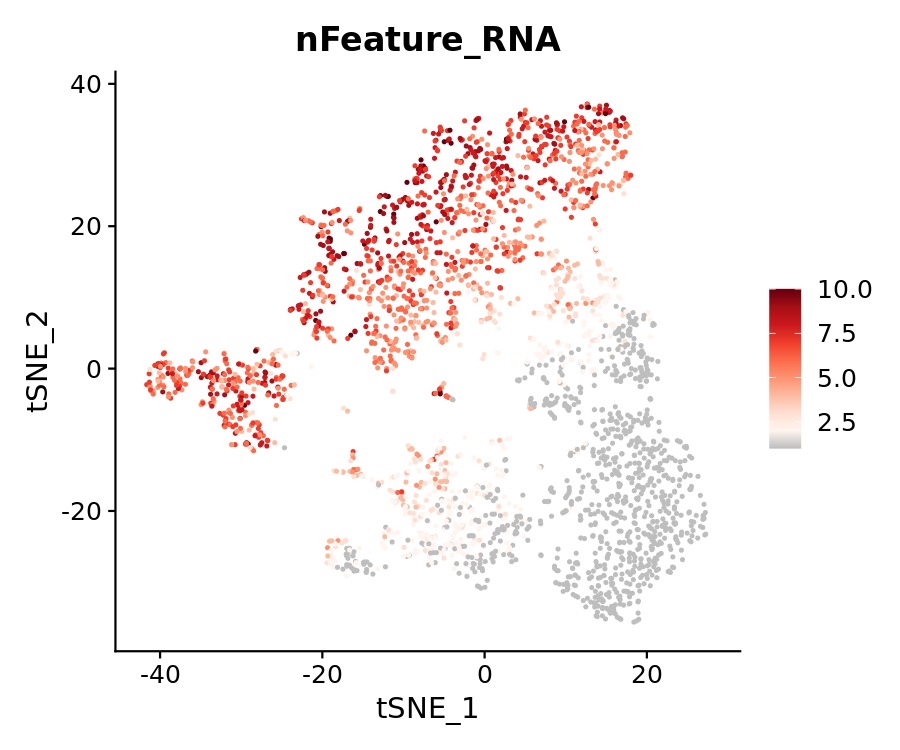

In [142]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
    object = seurat_object_TSC_norm, 
    features = "nFeature_RNA", 
            pt.size = 0.5)

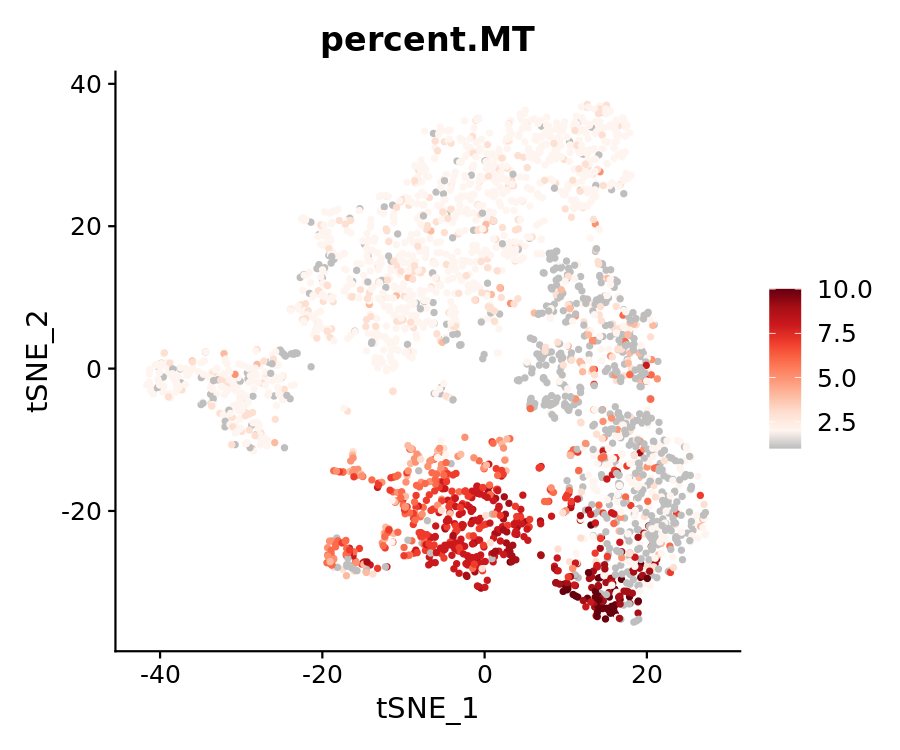

In [158]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
    object = seurat_object_TSC_norm, 
    features = "percent.MT", 
            pt.size = 1)

In [159]:
pdf(file="tSNE_tsc_prc2i_percent.MT.pdf", height = 5, width = 6)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
    object = seurat_object_TSC_norm, 
    features = "percent.MT", 
            pt.size = 0.1)
dev.off()

png 
  2

## Filter taking into account mouse and human QC, to only keep human cells

In [14]:
seurat_object_NAIVE_fil1 <- subset(seurat_object_NAIVE_38, 
                                       subset = percent.MT < 25 & nCount_RNA < 40000 & nCount_RNA > 3000 &  nFeature_RNA < 8000 & nFeature_RNA > 1500)

In [15]:
seurat_object_NAIVE_fil1

An object of class Seurat 
24370 features across 2903 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [16]:
seurat_object_NAIVE_PRC2i_fil1 <- subset(seurat_object_NAIVE_PRC2i_38, 
                                       subset = percent.MT < 25 & nCount_RNA < 40000 & nCount_RNA > 3000 &  nFeature_RNA < 8000 & nFeature_RNA > 1500)


In [17]:
seurat_object_NAIVE_PRC2i_fil1

An object of class Seurat 
24370 features across 3338 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [67]:
seurat_object_TSC_fil1 <- subset(seurat_object_TSC_38, 
                                       subset = percent.MT < 30 & nCount_RNA < 300000 & nCount_RNA > 10000 &  nFeature_RNA < 12000 & nFeature_RNA > 3000)


In [68]:
seurat_object_TSC_fil1

An object of class Seurat 
24370 features across 615 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [69]:
seurat_object_TSC_PRC2i_fil1 <- subset(seurat_object_TSC_PRC2i_38, 
                                       subset = percent.MT < 30 & nCount_RNA < 300000 & nCount_RNA > 10000 &  nFeature_RNA < 12000 & nFeature_RNA > 3000)

In [70]:
seurat_object_TSC_PRC2i_fil1

An object of class Seurat 
24370 features across 773 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

## Merge the 4 seurat objects into 1

merge merges the raw count matrices of two Seurat objects and creates a new Seurat object with the resulting combined raw count matrix. To easily tell which original object any particular cell came from, you can set the add.cell.ids parameter with an c(x, y) vector, which will prepend the given identifier to the beginning of each cell name.

In [71]:
seurat_object_naive <- merge(seurat_object_NAIVE_fil1, y = seurat_object_NAIVE_PRC2i_fil1, add.cell.ids = c("NAIVE", "NAIVEPRC2i"), project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object_naive

An object of class Seurat 
24370 features across 6241 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [72]:
seurat_object_TSC <- merge(seurat_object_TSC_fil1, y = seurat_object_TSC_PRC2i_fil1, add.cell.ids = c("TSC", "TSCPRC2i"), project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object_TSC

An object of class Seurat 
24370 features across 1388 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [73]:
seurat_object <- merge(seurat_object_TSC, y = seurat_object_naive, project = "NAIVE_TSC_PRC2i_Irene_VP")
seurat_object

An object of class Seurat 
24370 features across 7629 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

In [74]:
head(seurat_object@meta.data)

orig.ident               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP  79984      8416       
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 187905     10316       
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 103178      8633       
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP  70210      8112       
TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP  67006      7910       
TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP  56056      7707       
                       percent.MT
TSC_AAACCCACACTCCGGA.1 12.40998  
TSC_AAACGAAGTAAGGCCA.1 13.33493  
TSC_AAACGCTTCTACTGAG.1 12.52302  
TSC_AAAGGGCCATGGAATA.1 18.62555  
TSC_AAAGGTAAGATGCTGG.1 15.51354  
TSC_AAAGTCCAGAAACACT.1 16.82068

## Retrieve Sample IDs

In [75]:
barcode <- rownames(seurat_object@meta.data)

In [76]:
seurat_object_2 <- cbind(barcode,seurat_object@meta.data)

In [77]:
head(seurat_object_2)

barcode                orig.ident              
TSC_AAACCCACACTCCGGA.1 TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP
TSC_AAACGAAGTAAGGCCA.1 TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP
TSC_AAACGCTTCTACTGAG.1 TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP
TSC_AAAGGGCCATGGAATA.1 TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP
TSC_AAAGGTAAGATGCTGG.1 TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP
TSC_AAAGTCCAGAAACACT.1 TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP
                       nCount_RNA nFeature_RNA percent.MT
TSC_AAACCCACACTCCGGA.1  79984      8416        12.40998  
TSC_AAACGAAGTAAGGCCA.1 187905     10316        13.33493  
TSC_AAACGCTTCTACTGAG.1 103178      8633        12.52302  
TSC_AAAGGGCCATGGAATA.1  70210      8112        18.62555  
TSC_AAAGGTAAGATGCTGG.1  67006      7910        15.51354  
TSC_AAAGTCCAGAAACACT.1  56056      7707        16.82068

In [78]:
library(tidyverse)

In [79]:
seurat_object_3 <- separate(seurat_object_2, barcode, c("sample_ID", NA), sep = "_", remove = FALSE)

In [80]:
head(seurat_object_3)

barcode                sample_ID
TSC_AAACCCACACTCCGGA.1 TSC_AAACCCACACTCCGGA.1 TSC      
TSC_AAACGAAGTAAGGCCA.1 TSC_AAACGAAGTAAGGCCA.1 TSC      
TSC_AAACGCTTCTACTGAG.1 TSC_AAACGCTTCTACTGAG.1 TSC      
TSC_AAAGGGCCATGGAATA.1 TSC_AAAGGGCCATGGAATA.1 TSC      
TSC_AAAGGTAAGATGCTGG.1 TSC_AAAGGTAAGATGCTGG.1 TSC      
TSC_AAAGTCCAGAAACACT.1 TSC_AAAGTCCAGAAACACT.1 TSC      
                       orig.ident               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP  79984      8416       
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 187905     10316       
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 103178      8633       
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP  70210      8112       
TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP  67006      7910       
TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP  56056      7707       
                       percent.MT
TSC_AAACCCACACTCCGGA.1 12.40998  
TSC_AAACGAAGTAAGGCCA.1 13.33493  
TSC_AAACGCTTCTACTGAG.1 12.52302  
TSC_AAAGGGCCATGGAATA.1 18.62555  
TSC_AAAGGTAAGATGCTGG.1 15.51354  
TSC_AAAGTCCAGAAACACT.1 16.82068

In [81]:
unique(seurat_object_3$sample_ID)

[1] "TSC"        "TSCPRC2i"   "NAIVE"      "NAIVEPRC2i"

In [82]:
class(seurat_object_3)

[1] "data.frame"

In [83]:
sampleidentity <- seurat_object_3["sample_ID"]

In [84]:
head(sampleidentity)

sample_ID
TSC_AAACCCACACTCCGGA.1 TSC      
TSC_AAACGAAGTAAGGCCA.1 TSC      
TSC_AAACGCTTCTACTGAG.1 TSC      
TSC_AAAGGGCCATGGAATA.1 TSC      
TSC_AAAGGTAAGATGCTGG.1 TSC      
TSC_AAAGTCCAGAAACACT.1 TSC

In [85]:
sampleidentity$sample_ID <- as.character(sampleidentity$sample_ID)

In [86]:
class(sampleidentity$sample_ID)

[1] "character"

In [87]:
seurat_object_samples <- AddMetaData(
    object = seurat_object, 
    metadata = sampleidentity$sample_ID, 
    col.name = 'sample')

In [88]:
head(seurat_object_samples@meta.data)

orig.ident               nCount_RNA nFeature_RNA
TSC_AAACCCACACTCCGGA.1 naive_TSC_PRC2i_Irene_VP  79984      8416       
TSC_AAACGAAGTAAGGCCA.1 naive_TSC_PRC2i_Irene_VP 187905     10316       
TSC_AAACGCTTCTACTGAG.1 naive_TSC_PRC2i_Irene_VP 103178      8633       
TSC_AAAGGGCCATGGAATA.1 naive_TSC_PRC2i_Irene_VP  70210      8112       
TSC_AAAGGTAAGATGCTGG.1 naive_TSC_PRC2i_Irene_VP  67006      7910       
TSC_AAAGTCCAGAAACACT.1 naive_TSC_PRC2i_Irene_VP  56056      7707       
                       percent.MT sample
TSC_AAACCCACACTCCGGA.1 12.40998   TSC   
TSC_AAACGAAGTAAGGCCA.1 13.33493   TSC   
TSC_AAACGCTTCTACTGAG.1 12.52302   TSC   
TSC_AAAGGGCCATGGAATA.1 18.62555   TSC   
TSC_AAAGGTAAGATGCTGG.1 15.51354   TSC   
TSC_AAAGTCCAGAAACACT.1 16.82068   TSC

In [89]:
seurat_object_samples

An object of class Seurat 
24370 features across 7629 samples within 1 assay 
Active assay: RNA (24370 features, 0 variable features)

## Normalize 

After removing unwanted cells from the dataset, the next step is to normalize the data. By default, we employ a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result. Normalized values are stored in pbmc[["RNA"]]@data.

In [5]:
seurat_object_norm <- NormalizeData(seurat_object_samples, normalization.method = "LogNormalize", scale.factor = 10000)

We next calculate a subset of features that exhibit high cell-to-cell variation in the dataset (i.e, they are highly expressed in some cells, and lowly expressed in others).
These will be used in downstream analysis, like PCA.

In [6]:
seurat_object_norm <- FindVariableFeatures(seurat_object_norm, selection.method = "vst", nfeatures = 2000)

In [7]:
dim(seurat_object_norm@assays$RNA)
seurat_object_norm@assays$RNA[1:5,1:5]

[1] 24370  7629

5 x 5 sparse Matrix of class "dgCMatrix"
         TSC_AAACCCACACTCCGGA.1 TSC_AAACGAAGTAAGGCCA.1 TSC_AAACGCTTCTACTGAG.1
SCYL3                 .                      0.0518506              .        
C1orf112              0.2231836              .                      0.2552309
FGR                   .                      .                      .        
CFH                   .                      .                      .        
STPG1                 .                      .                      .        
         TSC_AAAGGGCCATGGAATA.1 TSC_AAAGGTAAGATGCTGG.1
SCYL3                         .              0.1391012
C1orf112                      .              0.2611949
FGR                           .              .        
CFH                           .              .        
STPG1                         .              .        

In [8]:
top20 <- head(VariableFeatures(seurat_object_norm), 20)

In [9]:
print(top20)

 [1] "PTN"      "NPPB"     "HAND1"    "GATA2"    "ACTC1"    "TAGLN"   
 [7] "CCKBR"    "S100A16"  "MARCKS"   "KRT18"    "H19"      "S100A6"  
[13] "LRP2"     "VIM"      "ANKRD1"   "TINAGL1"  "ACTA1"    "MIR205HG"
[19] "GATA3"    "NR2F2"   


## Scaling the data

Next, we apply a linear transformation (‘scaling’) that is a standard pre-processing step prior to dimensional reduction techniques like PCA. This might take long.

In [10]:
all.genes <- rownames(seurat_object_norm)
seurat_object_norm <- ScaleData(seurat_object_norm, features = all.genes)

Centering and scaling data matrix



In [11]:
dim(seurat_object_norm@assays$RNA)

[1] 24370  7629

## PCA on the total dataset

Next we perform PCA on the scaled data. By default, only the previously determined variable features are used as input, but can be defined using features argument if you wish to choose a different subset.

In [12]:
seurat_object_norm <- RunPCA(seurat_object_norm, 
                         features = VariableFeatures(object = seurat_object_norm),
                         npcs=60,
                         nfeatures.print=10,
                         ndims.print=1:5,
                         seed.use=25)

PC_ 1 
Positive:  DPPA5, ALPG, RRAD, DPPA3, NUPR1, MT2A, UNC5B-AS1, YPEL2, KLF17, FEZ2 
Negative:  PALM2AKAP2, DUSP5, RAB31, KRT18, PHLDA1, COTL1, MARCKS, SLC38A1, ANXA1, CLDN4 
PC_ 2 
Positive:  HAND1, LRP2, GATA2, TINAGL1, PTN, KANK4, HAPLN1, P2RY6, PRTG, WNT5A 
Negative:  SFRP2, THY1, DPPA5, ETV4, DCLK1, ZNF483, FGF2, ETV1, VSNL1, PTPRZ1 
PC_ 3 
Positive:  PLAU, ANXA1, ACTG2, ALPP, SERPINE1, EPHA2, FOSL1, S100P, SFN, S100A6 
Negative:  PTPRZ1, FABP5, SOX11, DNMT3B, CD24, PTN, FST, TERF1, CCKBR, KDR 
PC_ 4 
Positive:  TAGLN, SPP1, COL1A2, CAST, PODXL, CDH13, SOX11, PTPRD, GAP43, CAV1 
Negative:  ATG9B, KLHL15, DDX21, IFI16, SNHG15, ZFP36L2, UPP1, KLF5, CREB5, LCP1 
PC_ 5 
Positive:  H2AZ1, FTL, FTH1, SUMO2, GPX4, TMSB10, PFN1, RANBP1, MT2A, TXN 
Negative:  MT-ND6, MALAT1, DSP, DST, LAMC1, MACF1, RIMKLB, AHNAK, COL6A1, PLCG2 



# Perform cell clustering

Seurat v3 applies a graph-based clustering approach, building upon initial strategies in (Macosko et al). Importantly, the distance metric which drives the clustering analysis (based on previously identified PCs) remains the same. However, our approach to partitioning the cellular distance matrix into clusters has dramatically improved. Our approach was heavily inspired by recent manuscripts which applied graph-based clustering approaches to scRNA-seq data [SNN-Cliq, Xu and Su, Bioinformatics, 2015] and CyTOF data [PhenoGraph, Levine et al., Cell, 2015]. Briefly, these methods embed cells in a graph structure - for example a K-nearest neighbor (KNN) graph, with edges drawn between cells with similar feature expression patterns, and then attempt to partition this graph into highly interconnected ‘quasi-cliques’ or ‘communities’.

As in PhenoGraph, we first construct a KNN graph based on the euclidean distance in PCA space, and refine the edge weights between any two cells based on the shared overlap in their local neighborhoods (Jaccard similarity). This step is performed using the FindNeighbors() function, and takes as input the previously defined dimensionality of the dataset (first 10 PCs).

To cluster the cells, we next apply modularity optimization techniques such as the Louvain algorithm (default) or SLM [SLM, Blondel et al., Journal of Statistical Mechanics], to iteratively group cells together, with the goal of optimizing the standard modularity function. The FindClusters() function implements this procedure, and contains a resolution parameter that sets the ‘granularity’ of the downstream clustering, with increased values leading to a greater number of clusters. We find that setting this parameter between 0.4-1.2 typically returns good results for single-cell datasets of around 3K cells. Optimal resolution often increases for larger datasets. The clusters can be found using the Idents() function.

In [13]:
use.pcs = 1:10

In [14]:
seurat_object_norm <- FindNeighbors(seurat_object_norm, dims = use.pcs)

Computing nearest neighbor graph

Computing SNN



In [15]:
seurat_object_norm <- FindClusters(seurat_object_norm,dims = use.pcs, resolution = 0.2)

Warning message:
"The following arguments are not used: dims"
Warning message:
"The following arguments are not used: dims"


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7629
Number of edges: 227449

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8761
Number of communities: 3
Elapsed time: 1 seconds


In [16]:
seurat_object_norm <- RunUMAP(seurat_object_norm, dims = use.pcs, spread = 30)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
11:13:23 UMAP embedding parameters a = 0.008175 b = 0.8006

11:13:23 Read 7629 rows and found 10 numeric columns

11:13:23 Using Annoy for neighbor search, n_neighbors = 30

11:13:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:13:23 Writing NN index file to temp file /tmp/Rtmpgha2I4/file6d8c26db948b

11:13:23 Searching Annoy index using 1 thread, search_k = 3000

11:13:26 Annoy recall = 100%

11:13:27 Commencing smooth kNN distance calibration using 1 thread

11:13:28 Initializing 

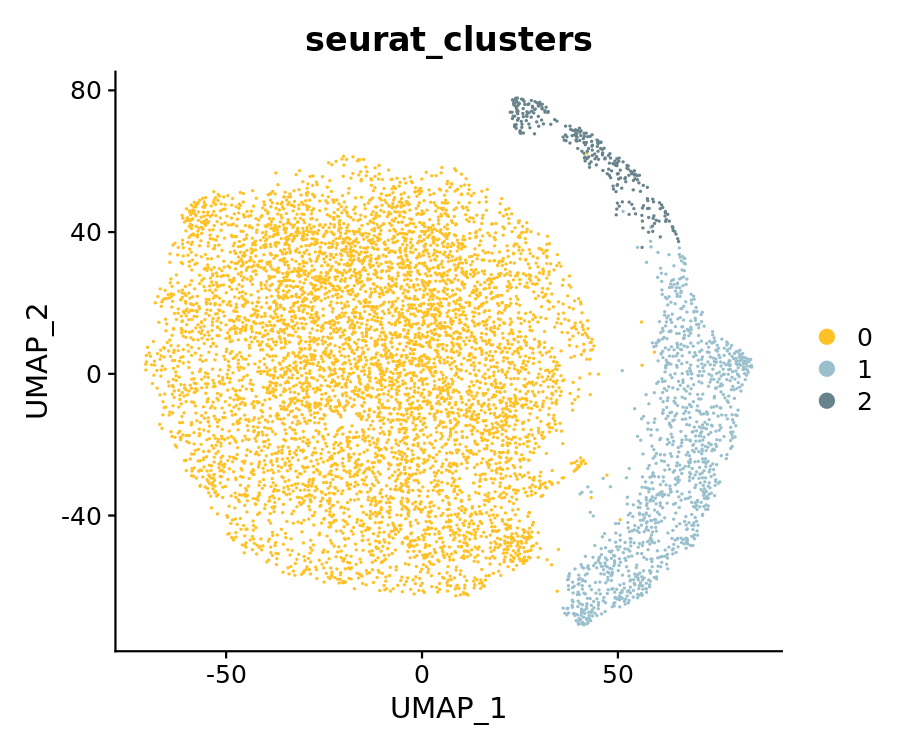

In [17]:
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(seurat_object_norm, reduction = "umap", pt.size = .1, group.by = "seurat_clusters", cols = c("goldenrod1","lightblue3", "lightblue4"))

In [178]:
pdf(file="UMAP_naive_tsc_prc2i_CLUSTERS.pdf", height = 5, width = 6)
DimPlot(seurat_object_norm, reduction = "umap", pt.size = .1, group.by = "seurat_clusters", cols = c("goldenrod1","lightblue3", "lightblue4"))
dev.off()

png 
  2

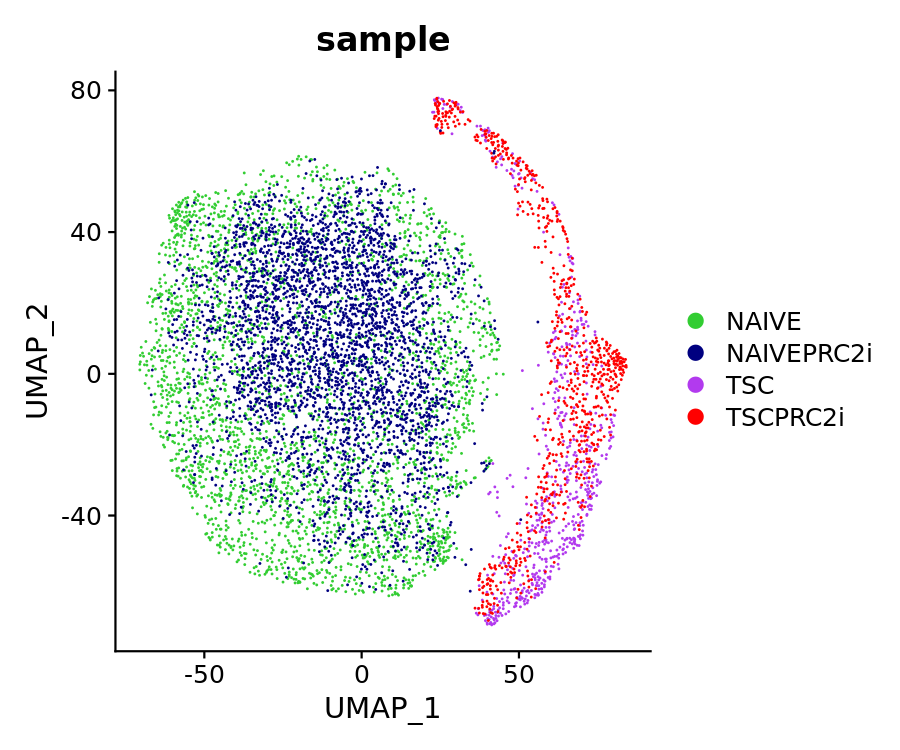

In [18]:
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(seurat_object_norm, reduction = "umap", pt.size = .01, group.by = "sample", cols = c("limegreen", "navy", "darkorchid2", "red1"))

In [179]:
pdf(file="UMAP_naive_tsc_prc2i_SAMPLES.pdf", height = 5, width = 6)
DimPlot(seurat_object_norm, reduction = "umap", pt.size = .01, group.by = "sample", cols = c("limegreen", "navy", "darkorchid2", "red1"))
dev.off()

png 
  2

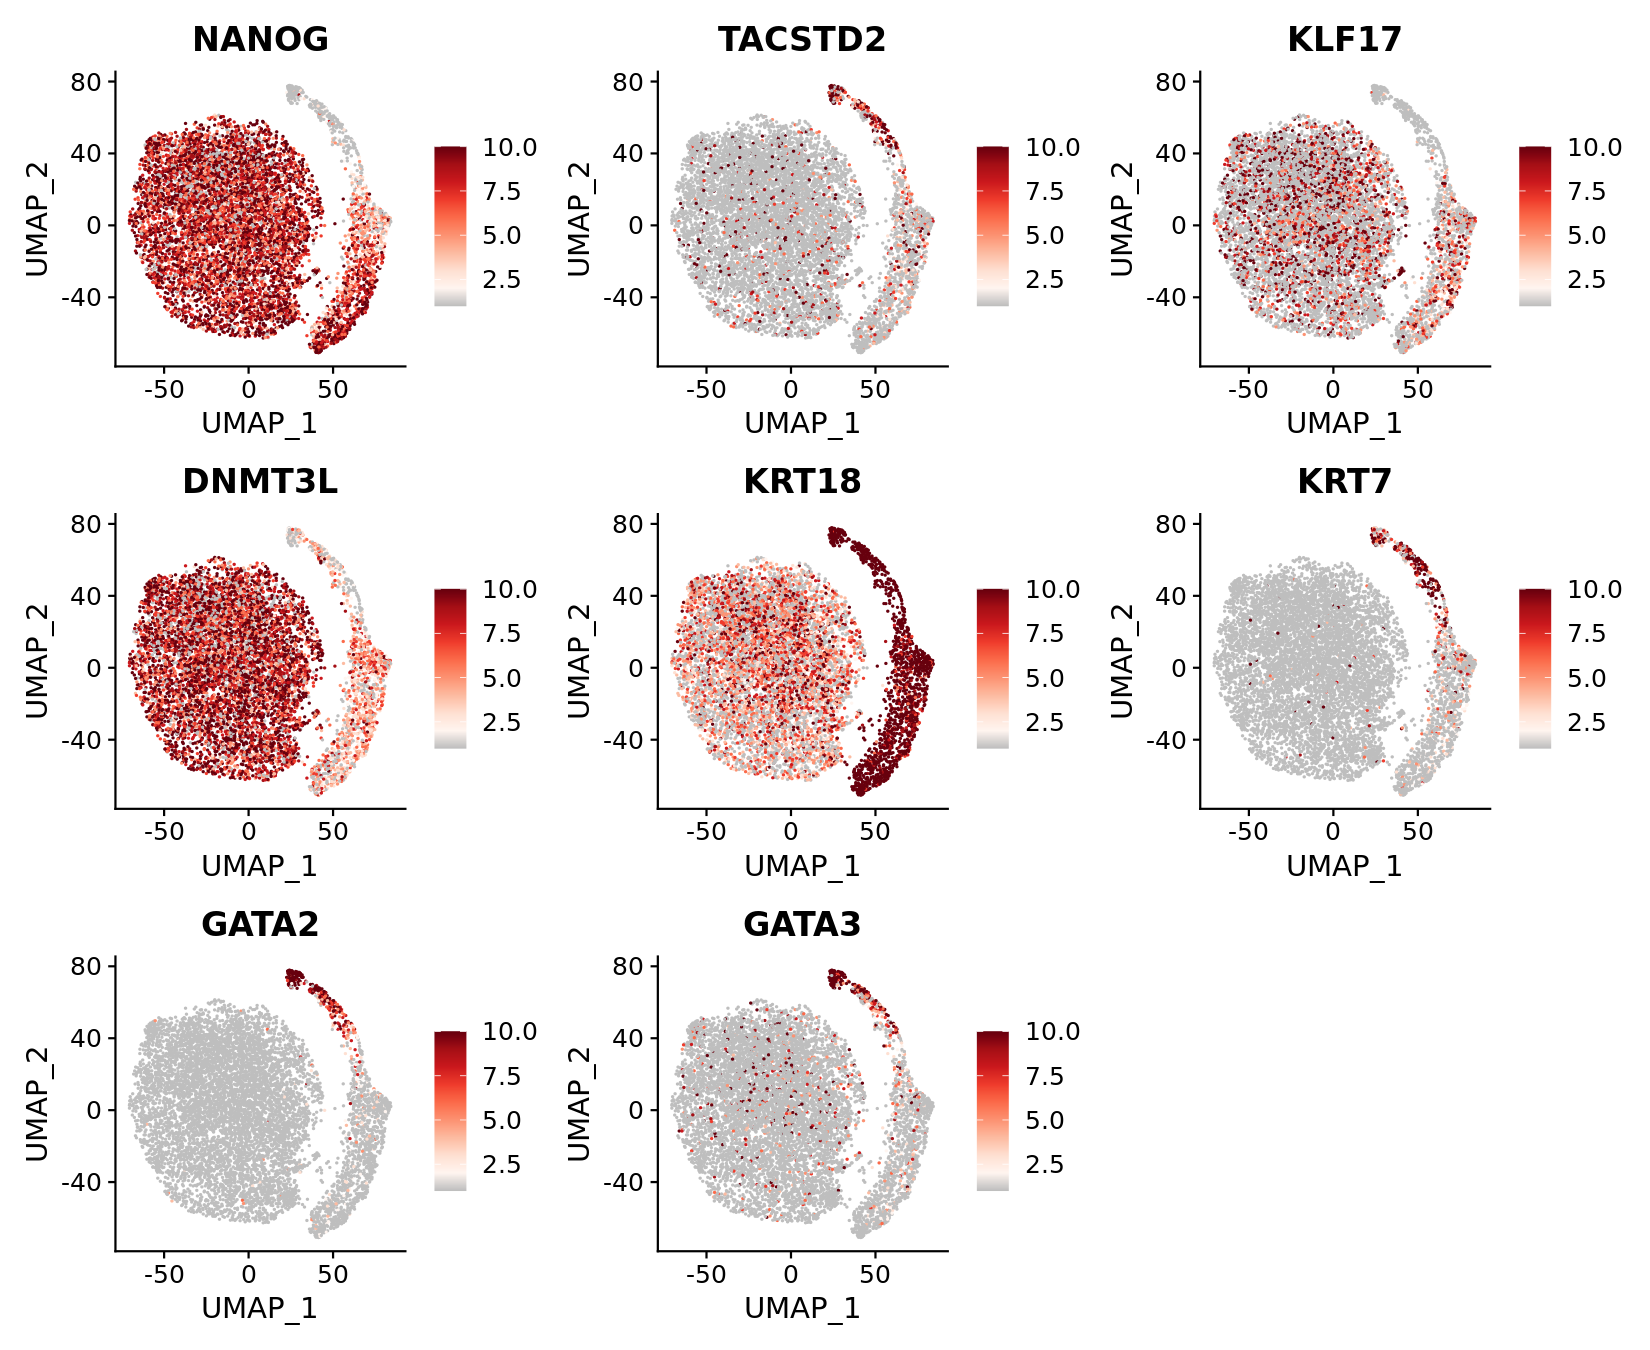

In [8]:
options(repr.plot.width = 11, repr.plot.height = 9, repr.plot.res = 150)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = seurat_object_norm,
  features = c("NANOG", "TACSTD2", "KLF17","DNMT3L", "KRT18", "KRT7","GATA2", "GATA3"),
  pt.size = .1,
  max.cutoff = 'q75',
  ncol = 3
)

Perform DE analysis

Wilcoxon rank sum test is used as default

In [20]:
seurat_object.markers <- FindAllMarkers(seurat_object_norm, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
seurat_object.markers %>% group_by(cluster) %>% top_n(n = 20, wt = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene      
1   0.000000e+00 1.832950   0.999 0.996  0.000000e+00 0       MT1H      
2   0.000000e+00 1.790600   0.764 0.009  0.000000e+00 0       LEFTY2    
3   0.000000e+00 1.528060   0.983 0.916  0.000000e+00 0       CRIP1     
4   0.000000e+00 1.474975   0.999 0.993  0.000000e+00 0       MT1G      
5   0.000000e+00 1.390213   0.944 0.838  0.000000e+00 0       CD320     
6   0.000000e+00 1.376568   0.999 0.957  0.000000e+00 0       KHDC1L    
7   0.000000e+00 1.305104   1.000 0.997  0.000000e+00 0       NLRP7     
8   0.000000e+00 1.300696   0.993 0.975  0.000000e+00 0       TMEM160   
9   0.000000e+00 1.249714   0.983 0.895  0.000000e+00 0       TUBB4A    
10  0.000000e+00 1.218923   1.000 1.000  0.000000e+00 0       MIF       
11  0.000000e+00 1.171449   1.000 1.000  0.000000e+00 0       RPS28     
12  0.000000e+00 1.165441   0.987 0.981  0.000000e+00 0       PGK1      
13  0.000000e+00 1.122186   0.879 0.576  0.000000e+00 0       GDF3      
14  0.000000e+00 1.105170   0.904 0.540  0.000000e+00 0       FGF4      
15  0.000000e+00 1.098476   1.000 1.000  0.000000e+00 0       PRDX1     
16  0.000000e+00 1.072255   0.999 0.999  0.000000e+00 0       TOMM7     
17  0.000000e+00 1.036491   0.978 0.972  0.000000e+00 0       PRDX2     
18  0.000000e+00 1.028511   0.928 0.871  0.000000e+00 0       TBCD      
19  0.000000e+00 1.019044   0.990 0.978  0.000000e+00 0       MT1X      
20 2.490131e-277 1.355853   0.985 0.950 6.068448e-273 0       H4C3      
21  0.000000e+00 1.498434   0.996 0.433  0.000000e+00 1       CCND1     
22  0.000000e+00 1.374251   0.982 0.356  0.000000e+00 1       SLC7A8    
23  0.000000e+00 1.367340   0.964 0.102  0.000000e+00 1       PHLDA1    
24  0.000000e+00 1.328131   0.980 0.375  0.000000e+00 1       COTL1     
25  0.000000e+00 1.277868   0.999 0.644  0.000000e+00 1       KRT18     
26  0.000000e+00 1.253826   0.979 0.676  0.000000e+00 1       JARID2    
27  0.000000e+00 1.250230   0.987 0.647  0.000000e+00 1       MAP1B     
28  0.000000e+00 1.221425   0.976 0.547  0.000000e+00 1       ZFP36L2   
29  0.000000e+00 1.171530   0.998 0.999  0.000000e+00 1       MT-CYB    
30  0.000000e+00 1.166626   0.987 0.613  0.000000e+00 1       CCPG1     
31  0.000000e+00 1.160644   0.991 0.756  0.000000e+00 1       ITM2B     
32  0.000000e+00 1.145969   0.881 0.208  0.000000e+00 1       F3        
33  0.000000e+00 1.126875   0.998 0.865  0.000000e+00 1       LIN28A    
34  0.000000e+00 1.092869   1.000 0.958  0.000000e+00 1       L1TD1     
35  0.000000e+00 1.081732   0.912 0.192  0.000000e+00 1       UCHL1     
36  0.000000e+00 1.080867   0.909 0.232  0.000000e+00 1       FGF2      
37  0.000000e+00 1.067576   0.975 0.575  0.000000e+00 1       SMS       
38  0.000000e+00 1.056645   0.941 0.282  0.000000e+00 1       FGFR1     
39  0.000000e+00 1.055279   0.833 0.045  0.000000e+00 1       CCND2     
40  0.000000e+00 1.049715   0.992 0.740  0.000000e+00 1       TRIM71    
41  0.000000e+00 2.614009   0.794 0.023  0.000000e+00 2       PTN       
42  0.000000e+00 2.551250   0.944 0.027  0.000000e+00 2       HAND1     
43  0.000000e+00 2.282462   0.944 0.123  0.000000e+00 2       MARCKS    
44  0.000000e+00 2.130716   0.948 0.020  0.000000e+00 2       LRP2      
45  0.000000e+00 2.076820   0.951 0.026  0.000000e+00 2       GATA2     
46  0.000000e+00 1.863117   0.970 0.079  0.000000e+00 2       CLDN4     
47  0.000000e+00 1.861255   0.910 0.123  0.000000e+00 2       S100A16   
48  0.000000e+00 1.849397   0.978 0.047  0.000000e+00 2       PRTG      
49 1.517605e-301 1.778314   0.524 0.032 3.698403e-297 2       ACTC1     
50 4.423528e-296 2.464776   0.993 0.201 1.078014e-291 2       PALM2AKAP2
51 3.248636e-185 2.339072   1.000 0.493 7.916925e-181 2       SLC2A3    
52 1.353819e-169 3.592543   1.000 0.685 3.299258e-165 2       KRT18     
53 3.893667e-167 2.821176   1.000 0.760 9.488866e-163 2       KRT8      
54 2.048242e-166 2.396433   1.000 0.614 4.991565e-162 2      

In [23]:
write.csv(seurat_object.markers, "seurat_object.markers.csv", row.names=TRUE, quote=FALSE) 

In [21]:
seurat_object.markers

p_val        avg_log2FC pct.1  pct.2  p_val_adj    cluster gene    
MT1H     0            1.8329498  0.999  0.996  0            0       MT1H    
LEFTY2   0            1.7906004  0.764  0.009  0            0       LEFTY2  
CRIP1    0            1.5280595  0.983  0.916  0            0       CRIP1   
MT1G     0            1.4749747  0.999  0.993  0            0       MT1G    
CD320    0            1.3902134  0.944  0.838  0            0       CD320   
KHDC1L   0            1.3765685  0.999  0.957  0            0       KHDC1L  
NLRP7    0            1.3051038  1.000  0.997  0            0       NLRP7   
TMEM160  0            1.3006962  0.993  0.975  0            0       TMEM160 
TUBB4A   0            1.2497138  0.983  0.895  0            0       TUBB4A  
MIF      0            1.2189225  1.000  1.000  0            0       MIF     
RPS28    0            1.1714492  1.000  1.000  0            0       RPS28   
PGK1     0            1.1654407  0.987  0.981  0            0       PGK1    
GDF3     0            1.1221861  0.879  0.576  0            0       GDF3    
FGF4     0            1.1051700  0.904  0.540  0            0       FGF4    
PRDX1    0            1.0984765  1.000  1.000  0            0       PRDX1   
TOMM7    0            1.0722555  0.999  0.999  0            0       TOMM7   
PRDX2    0            1.0364914  0.978  0.972  0            0       PRDX2   
TBCD     0            1.0285115  0.928  0.871  0            0       TBCD    
MT1X     0            1.0190438  0.990  0.978  0            0       MT1X    
ATG3     0            0.9919508  0.983  0.973  0            0       ATG3    
PYGB     0            0.9878239  0.945  0.844  0            0       PYGB    
SLC6A8   0            0.9613314  0.877  0.766  0            0       SLC6A8  
MT1E     0            0.9548405  0.996  0.990  0            0       MT1E    
SERPINB6 0            0.9368978  0.893  0.781  0            0       SERPINB6
STMN1    0            0.9202158  0.994  0.992  0            0       STMN1   
RPL36    0            0.9041401  1.000  1.000  0            0       RPL36   
NDUFB2   0            0.8908925  0.980  0.977  0            0       NDUFB2  
RPL37A   0            0.8705962  1.000  1.000  0            0       RPL37A  
PFKL     0            0.8536526  0.905  0.907  0            0       PFKL    
NDUFA13  0            0.8228262  0.996  0.998  0            0       NDUFA13 
<U+22EE>   <U+22EE>     <U+22EE>   <U+22EE> <U+22EE> <U+22EE>     <U+22EE> <U+22EE>
DDX46    1.453022e-16 0.2534190  0.989  0.892  3.541015e-12 2       DDX46   
PTBP11   1.460921e-16 0.2875209  0.981  0.878  3.560263e-12 2       PTBP1   
ATP1A1   2.555507e-16 0.2777727  0.989  0.827  6.227770e-12 2       ATP1A1  
SLC7A111 3.223108e-16 0.3115486  0.824  0.536  7.854714e-12 2       SLC7A11 
FEZ21    3.625617e-16 0.4055856  0.951  0.778  8.835628e-12 2       FEZ2    
TOMM5    6.193760e-16 0.2636564  0.985  0.890  1.509419e-11 2       TOMM5   
PRSS12   6.510459e-16 0.4207081  0.925  0.670  1.586599e-11 2       PRSS12  
SUCO     8.294259e-16 0.2833753  0.891  0.613  2.021311e-11 2       SUCO    
LYAR     1.068883e-15 0.2688190  0.981  0.774  2.604868e-11 2       LYAR    
NUP50    1.126943e-15 0.2561078  0.989  0.764  2.746360e-11 2       NUP50   
SINHCAF1 1.151039e-15 0.2626652  0.978  0.810  2.805082e-11 2       SINHCAF 
MCUR1    1.356782e-15 0.3341703  0.929  0.688  3.306478e-11 2       MCUR1   
NME1     2.313471e-15 0.2651426  0.996  0.929  5.637928e-11 2       NME1    
CALR1    3.546124e-15 0.3036823  1.000  0.982  8.641904e-11 2       CALR    
ACTN4    4.509069e-15 0.2678490  0.989  0.934  1.098860e-10 2       ACTN4   
LIN28B1  4.985435e-15 0.2778375  1.000  0.943  1.214951e-10 2       LIN28B  
ZNF326   6.626004e-15 0.2676321  0.974  0.747  1.614757e-10 2       ZNF326  
CSNK1A11 2.598497e-14 0.2512995  0.996  0.880  6.332538e-10 2       CSNK1A1 
CLU      3.686084e-14 0.3521858  0.783  0.495  8.982986e-10 2       CLU     
WEE11    9.035462e-14 0.2750117  0.966  0.724  2.201942e-09 2       WEE1   

In [28]:
CLUSTER_MARKERS<-c("MT1H", "LEFTY2",  "CRIP1","MT1G","CD320", "KHDC1L",  "NLRP7", "TMEM160", "TUBB4A","MIF",  "RPS28",  "PGK1","GDF3", "FGF4", "PRDX1", "TOMM7", "PRDX2", "TBCD", "MT1X", "H4C3", # C0
                      "CCND1", "SLC7A8", "PHLDA1", "COTL1","KRT18","JARID2","MAP1B", "ZFP36L2", "CCPG1","ITM2B", "F3", "LIN28A", "L1TD1", "UCHL1", "FGF2", "SMS", "FGFR1", "CCND2", "TRIM71",   #C1
                      "PTN", "HAND1", "MARCKS", "LRP2", "GATA2",  "CLDN4","S100A16","PRTG", "ACTC1",  "PALM2AKAP2", "SLC2A3", "KRT8",  "AHNAK",  "KRT19","CD24", "FABP5", "CTSV", "PEG10", "H19") #C2

In [ ]:
#Extended Data Fig. 6c:

options(repr.plot.width = 7, repr.plot.height = 2.5, repr.plot.res = 150)
DotPlot(seurat_object_norm, features = CLUSTER_MARKERS,
               dot.scale = 8)+
    
    RotatedAxis()+
scale_colour_gradient2(low = "grey90", mid = "tomato", high = "tomato4")